In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
show = "Modern Family"

# TV Maze show search base URL
base_url = "http://api.tvmaze.com/search/shows?q="

target_url = base_url + show

response = requests.get(target_url).json()

print(json.dumps(response, indent = 4, sort_keys= True))

[
    {
        "score": 1.2041565,
        "show": {
            "_links": {
                "previousepisode": {
                    "href": "https://api.tvmaze.com/episodes/1809502"
                },
                "self": {
                    "href": "https://api.tvmaze.com/shows/80"
                }
            },
            "averageRuntime": 30,
            "dvdCountry": null,
            "ended": "2020-04-08",
            "externals": {
                "imdb": "tt1442437",
                "thetvdb": 95011,
                "tvrage": 22622
            },
            "genres": [
                "Comedy",
                "Family"
            ],
            "id": 80,
            "image": {
                "medium": "https://static.tvmaze.com/uploads/images/medium_portrait/359/898320.jpg",
                "original": "https://static.tvmaze.com/uploads/images/original_untouched/359/898320.jpg"
            },
            "language": "English",
            "name": "Modern Family",
 

In [3]:
# list of TV show titles to query
tv_shows = ["Modern Family", "Arrested Development", "Breaking Bad", "The Flash",
            "Vikings", "The Mandalorian", "Last of Us", "Peaky Blinders", "Big Bang Theory"]

# TV Maze show search base URL
base_url = "http://api.tvmaze.com/search/shows?q="

# set up lists to hold response data for name and rating
titles = []
ratings = []

# loop through TV show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])

In [4]:
# create DataFrame
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,title,rating
0,Modern Family,7.7
1,Arrested Development,8.3
2,Breaking Bad,9.3
3,The Flash,7.6
4,Vikings,8.6
5,The Mandalorian,8.6
6,The Last of Us,8.3
7,Peaky Blinders,8.5
8,The Big Bang Theory,8.0


<Axes: xlabel='title'>

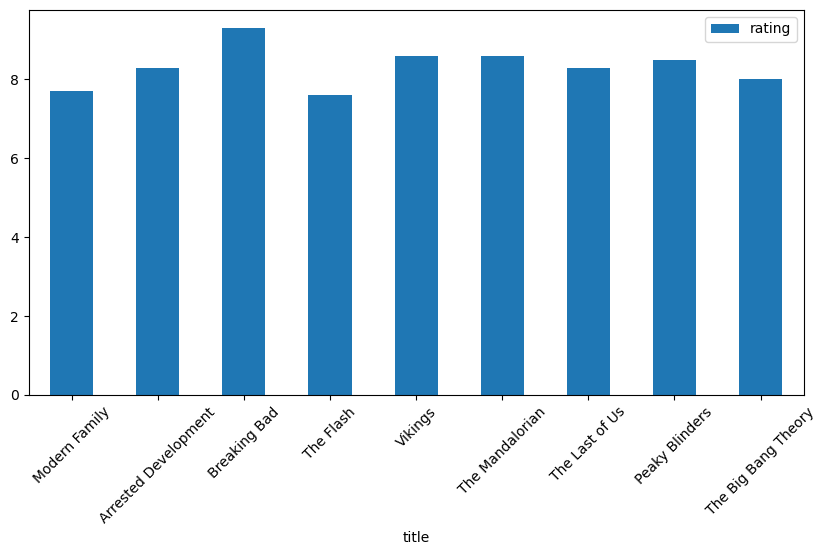

In [5]:
# Plot the data
shows_df.plot('title', 'rating', kind='bar', figsize=(10,5), rot=45)